In [3]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [4]:
df = pd.read_csv('data/finanzas-hotel-bookings.csv', index_col=0)

/home/adduser/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,5,13,14,15,16,20,21,26,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
0,Resort Hotel,False,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,0.0,NaN,0.0,C,C,3.0,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
1,Resort Hotel,False,737.0,NaN,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,NaN,NaN,Direct,0.0,0.0,0.0,NaN,C,4.0,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN


In [4]:
# Drop column 0
df.drop(columns=['0'], inplace=True)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
# Filter rows where all values are NaN
df[df.isnull().all(axis=1)].shape

(63200, 31)

In [7]:
# Drop rows where all values are NaN
df = df.dropna(how='all')

In [8]:
# Filter rows where all values are NaN
df[df.isnull().all(axis=1)].shape

(0, 31)

In [9]:
# Filter df dropping the columns that had values while all the others are Nan
df_filt = df.drop(columns=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']) 

In [10]:
# We store in a variable the indices of the rows where everything is NaN, except in those 3 columns (these are 100 rows, less than 1% of the total)
index = df_filt[df_filt.isnull().all(axis=1)].index 

In [11]:
df.shape

(119677, 31)

In [12]:
# Drop the 100 rows filtering by index 
df.drop(index=index, inplace=True)

In [13]:
df.shape

(119577, 31)

In [14]:
df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
November      6794
December      6780
March         5922
February      4898
3             3872
January       3581
2             3170
1             2348
Name: arrival_date_month, dtype: int64

In [15]:
# Mapping dictionary to convert values from categoric to numeric
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12, '1':1, '2':2, '3':3
}

# Apply the mapping dict to the month column
df.arrival_date_month = df.arrival_date_month.map(month_mapping).astype(float) # It has to be float because there are NaN values

In [16]:
df.arrival_date_month.value_counts()

8.0     13877
7.0     12661
5.0     11791
10.0    11160
4.0     11089
6.0     10939
9.0     10508
3.0      9794
2.0      8068
11.0     6794
12.0     6780
1.0      5929
Name: arrival_date_month, dtype: int64

In [17]:
df.adr.min()

-6.38

In [18]:
df.adr = abs(df.adr) # Convert values to absolute to correct the negative value

In [19]:
df.adr.min()

0.0

In [20]:
# NOTA: Pendiente de decidir que hacemos con esa columna
# df.reservation_status_date = pd.to_datetime(df.reservation_status_date, errors='coerce')

In [21]:
df.shape

(119577, 31)

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342.0,2015.0,7.0,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,0.0,NaN,0.0,C,C,3.0,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,737.0,NaN,7.0,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,NaN,NaN,Direct,0.0,0.0,0.0,NaN,C,4.0,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,7.0,2015.0,7.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,NaN,Direct,0.0,0.0,0.0,A,C,0.0,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,13.0,NaN,7.0,27.0,1.0,0.0,1.0,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,14.0,NaN,7.0,NaN,1.0,0.0,2.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03 00:00:00


In [23]:
# Selecciona solo las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object'])

# Calcula el porcentaje de valores nulos por columna
porcentaje_nulos_categoricas = columnas_categoricas.isnull().mean() * 100

# Muestra los porcentajes de nulos en las columnas categóricas
print(porcentaje_nulos_categoricas)

hotel                       0.156385
is_canceled                 0.156385
meal                        0.156385
country                    45.596561
market_segment             49.878321
distribution_channel       11.438655
reserved_room_type         33.703806
assigned_room_type          0.156385
customer_type              21.223145
reservation_status          0.156385
reservation_status_date    10.924342
dtype: float64


In [24]:
# Moda: hotel, is_canceled, meal, distribution_channel, assigned_room_type, resrvation_status
# Unknown: country, market_segment, reserved_room_type, customer_type
# assigned_room_type y resrverd_room type se pueden complementar

In [25]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['hotel', 'is_canceled', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')


In [26]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna HOTEL


City Hotel      0.663422
Resort Hotel    0.335014
Name: hotel, dtype: float64

........................
La distribución de las categorías para la columna IS_CANCELED


False    0.628599
True     0.369837
Name: is_canceled, dtype: float64

........................
La distribución de las categorías para la columna MEAL


BB           0.771971
HB           0.120951
SC           0.089064
Undefined    0.009776
FB           0.006674
Name: meal, dtype: float64

........................
La distribución de las categorías para la columna COUNTRY


PRT    0.222258
GBR    0.055069
FRA    0.048136
ESP    0.039406
DEU    0.033217
         ...   
LIE    0.000008
NIC    0.000008
GGY    0.000008
FJI    0.000008
UMI    0.000008
Name: country, Length: 163, dtype: float64

........................
La distribución de las categorías para la columna MARKET_SEGMENT


Online TA        0.236927
Offline TA/TO    0.101324
Groups           0.083695
Direct           0.053137
Corporate        0.022103
Complementary    0.003036
Aviation         0.000987
Undefined        0.000008
Name: market_segment, dtype: float64

........................
La distribución de las categorías para la columna DISTRIBUTION_CHANNEL


TA/TO        0.726076
Direct       0.108691
Corporate    0.049332
GDS          0.001472
Undefined    0.000042
Name: distribution_channel, dtype: float64

........................
La distribución de las categorías para la columna RESERVED_ROOM_TYPE


A    0.478370
D    0.105681
E    0.036336
F    0.015948
G    0.011499
B    0.006239
C    0.005227
H    0.003579
P    0.000050
L    0.000033
Name: reserved_room_type, dtype: float64

........................
La distribución de las categorías para la columna ASSIGNED_ROOM_TYPE


A    0.619291
D    0.211763
E    0.065280
F    0.031369
G    0.021350
C    0.019862
B    0.018089
H    0.005954
I    0.003036
K    0.002333
P    0.000100
L    0.000008
Name: assigned_room_type, dtype: float64

........................
La distribución de las categorías para la columna CUSTOMER_TYPE


Transient          0.590498
Transient-Party    0.165910
Contract           0.027514
Group              0.003847
Name: customer_type, dtype: float64

........................
La distribución de las categorías para la columna RESERVATION_STATUS


Check-Out    0.628599
Canceled     0.359743
No-Show      0.010094
Name: reservation_status, dtype: float64

........................
La distribución de las categorías para la columna RESERVATION_STATUS_DATE


2015-10-21 00:00:00    0.010855
2015-07-06 00:00:00    0.006122
2016-11-25 00:00:00    0.005787
2015-01-01 00:00:00    0.005670
2016-01-18 00:00:00    0.004700
                         ...   
2029-04-31             0.000008
2022-09-31             0.000008
2029-02-30             0.000008
2029-06-31             0.000008
2024-11-31             0.000008
Name: reservation_status_date, Length: 991, dtype: float64

........................


In [27]:


def imputar_nulos_categorias_especiales(df):
    
    
    # Definir las imputaciones para cada columna
    imputaciones = {
        'country': 'Undefined',
        'market_segment': 'Undefined',
        'customer_type' : 'Undefined',
        'reserved_room_type' : 'Undefined'}

    # Imputar los valores nulos
    for columna, valor in imputaciones.items():
        df[columna].fillna(valor, inplace=True)
    
    return df




In [28]:
df = imputar_nulos_categorias_especiales(df)

In [29]:


def imputar_nulos_con_moda(df):
    
    # Lista de columnas a imputar con la moda
    columnas = ['reservation_status', 'hotel', 'is_canceled', 'distribution_channel','meal', 'assigned_room_type']

    # Imputar los valores nulos en cada columna con la moda
    for columna in columnas:
        moda = df[columna].mode()[0]
        df[columna].fillna(moda, inplace=True)
    
    return df




In [30]:
df = imputar_nulos_con_moda(df)

In [31]:
# Selecciona solo las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object'])

# Calcula el porcentaje de valores nulos por columna
porcentaje_nulos_categoricas = columnas_categoricas.isnull().mean() * 100

# Muestra los porcentajes de nulos en las columnas categóricas
print(porcentaje_nulos_categoricas)

hotel                       0.000000
meal                        0.000000
country                     0.000000
market_segment              0.000000
distribution_channel        0.000000
reserved_room_type         33.703806
assigned_room_type          0.156385
customer_type               0.000000
reservation_status          0.000000
reservation_status_date    10.924342
dtype: float64


In [10]:
df["reservation_status"].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [11]:
df["reservation_status_date"].value_counts()

2015-10-21 00:00:00    1298
2015-07-06 00:00:00     732
2016-11-25 00:00:00     692
2015-01-01 00:00:00     678
2016-01-18 00:00:00     562
                       ... 
2029-04-31                1
2022-09-31                1
2029-02-30                1
2029-06-31                1
2024-11-31                1
Name: reservation_status_date, Length: 991, dtype: int64

In [ ]:
# reservation_status_date -> dropear

In [32]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [33]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df[nulos_esta_num].isnull().sum() / df.shape[0]

lead_time                         0.001564
arrival_date_year                 0.457847
arrival_date_month                0.001564
arrival_date_week_number          0.155323
arrival_date_day_of_month         0.002559
stays_in_weekend_nights           0.001564
stays_in_week_nights              0.001564
adults                            0.001246
children                          0.420440
babies                            0.001221
is_repeated_guest                 0.043495
previous_cancellations            0.362520
previous_bookings_not_canceled    0.001564
booking_changes                   0.001330
agent                             0.138212
company                           0.967636
days_in_waiting_list              0.001564
adr                               0.001564
required_car_parking_spaces       0.001564
total_of_special_requests         0.001564
dtype: float64

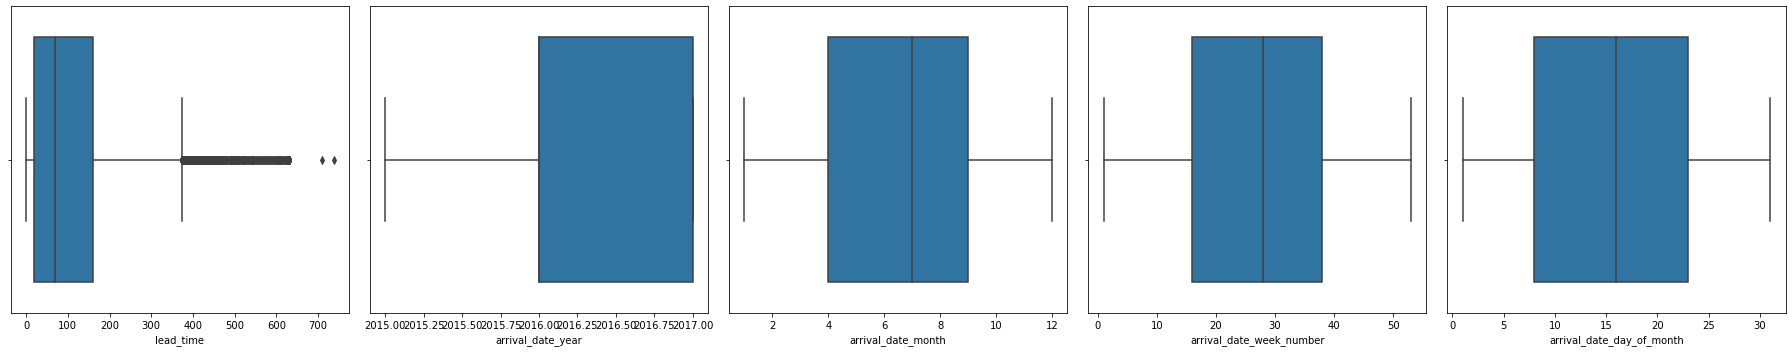

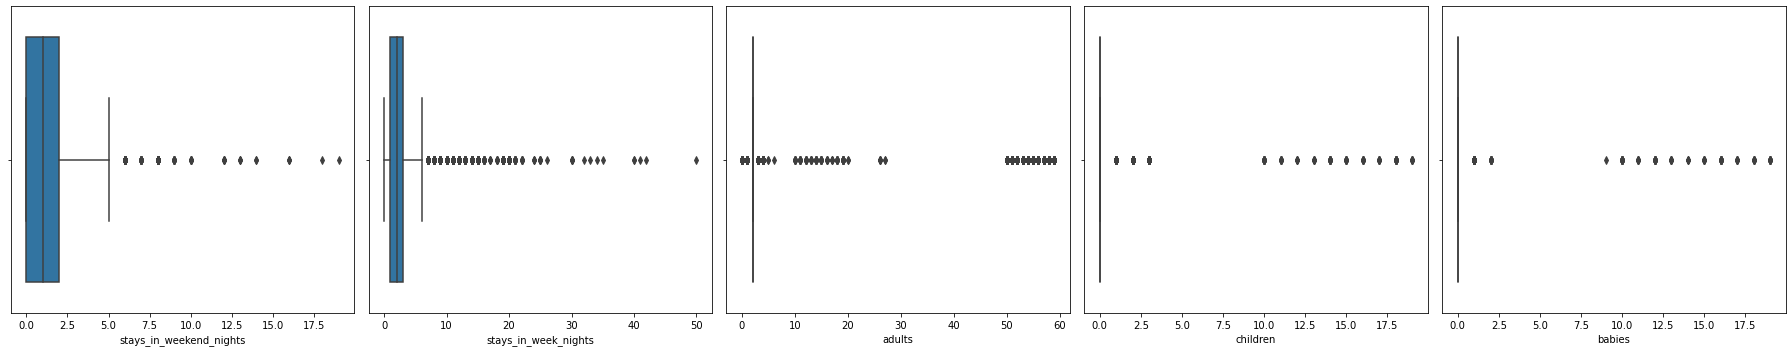

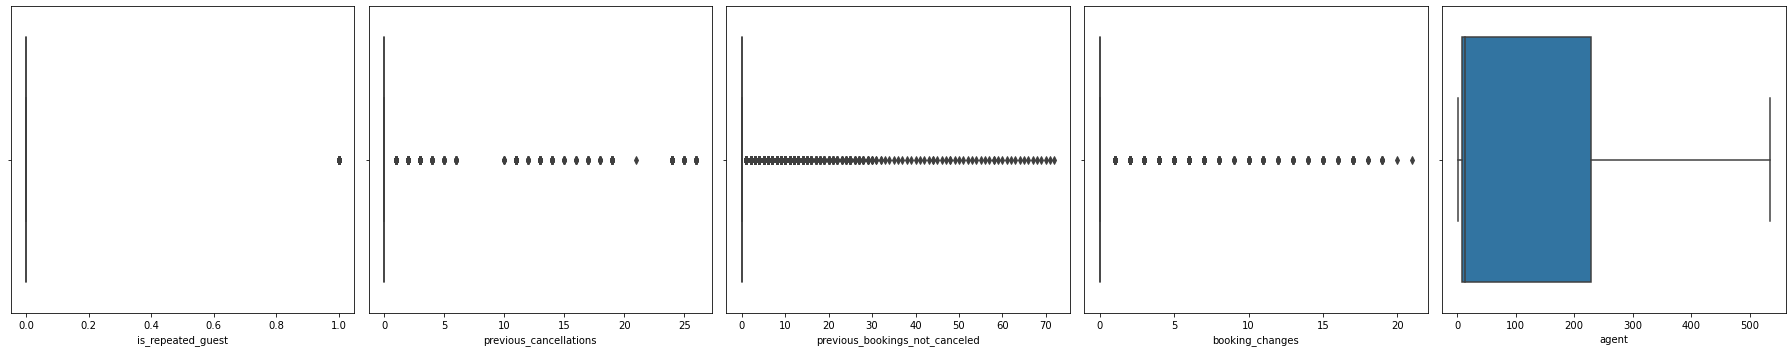

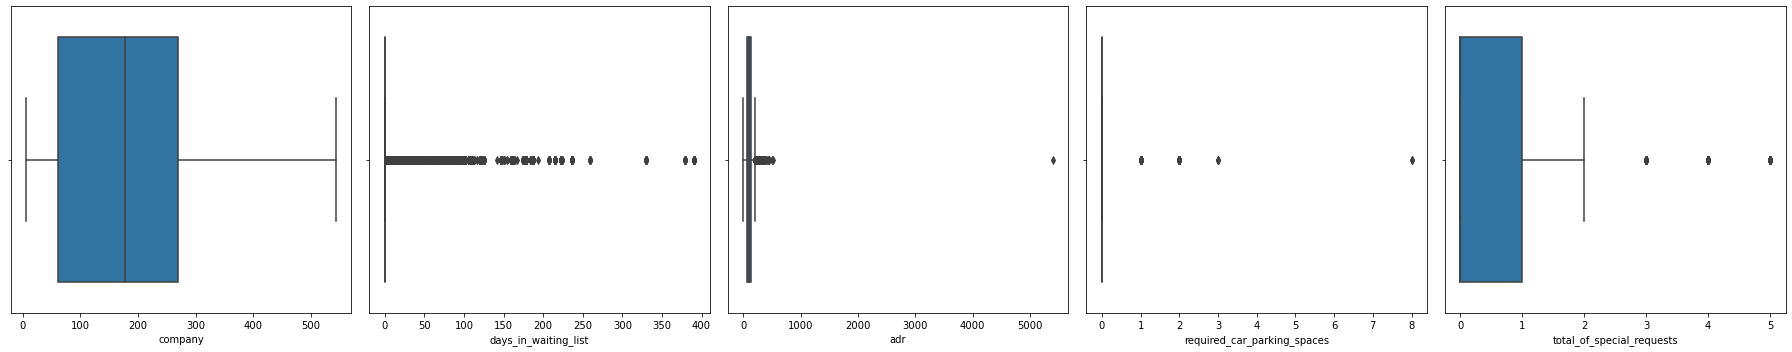

In [34]:

import math

# Lista de las columnas numéricas con nulos
nulos_esta_num = [
    'lead_time', 'arrival_date_year', 'arrival_date_month',
    'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests'
]

# Definir el tamaño del lote
lote_size = 5

# Iterar sobre las columnas en grupos de 5
for i in range(0, len(nulos_esta_num), lote_size):
    # Seleccionar el grupo de columnas
    cols_lote = nulos_esta_num[i:i + lote_size]
    
    # Calcular el número de columnas para la cuadrícula
    num_cols = len(cols_lote)
    
    # Crear la figura y los ejes de los subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))
    
    # Asegurarse de que 'axes' sea iterable, incluso si es un solo subplot
    if num_cols == 1:
        axes = [axes]
    
    # Crear un boxplot para cada columna en el lote actual
    for indice, col in enumerate(cols_lote):
        sns.boxplot(x=col, data=df, ax=axes[indice])
    
    # Ajustar el layout
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()


In [35]:
# Imputar valores nulos con la mediana para columnas con pocos nulos
columns_median = [
    'lead_time', 'arrival_date_month','arrival_date_day_of_month', 'stays_in_weekend_nights', 
    'stays_in_week_nights', 'previous_bookings_not_canceled', 
    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
    'total_of_special_requests'
]

for col in columns_median:
    df[col].fillna(df[col].median(), inplace=True)

# Imputar valores nulos con la moda para otras columnas
columns_mode = [
    'arrival_date_year', 'arrival_date_week_number', 
    'is_repeated_guest', 'previous_cancellations', 'agent', "babies", "adults"
]

for col in columns_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Eliminar la columna 'company' debido a un alto porcentaje de valores nulos
#df.drop(columns=['company'], inplace=True)


In [15]:
df1 = df[(df["babies"].notnull()) & (df["children"].notnull())]

In [21]:
df1[["babies","children"]][(df1["babies"]> 0) & (df1["children"]> 0)].sample(30)

,babies,children
19721,1.0,1.0
26730,12.0,2.0
94182,1.0,1.0
86467,1.0,1.0
101909,1.0,1.0
15898,1.0,1.0
35044,19.0,1.0
23688,1.0,1.0
31863,1.0,2.0
9041,1.0,1.0


In [22]:
df["total_children"] = df["children"] + df ["babies"] #tener en cuenta los nulos

In [24]:
df["total_children"].unique()

array([nan,  0.,  1.,  2., 10., 19.,  3., 17., 11., 18., 13., 16., 14.,
       15., 20., 12.])

In [25]:
df["total_children"].isnull().sum()

113607

In [12]:
df["children"].value_counts()

0.0     64221
1.0      2797
2.0      2138
3.0        45
18.0       17
10.0       15
14.0       15
15.0       10
11.0        9
16.0        9
17.0        8
19.0        7
13.0        6
12.0        5
Name: children, dtype: int64

In [36]:
porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
porc_nulos

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                33.703806
assigned_room_type                 0.156385
booking_changes                    0.000000
agent                           

In [37]:
df.duplicated().sum()

7667

In [38]:
# Mostrar todas las filas duplicadas
duplicados = df[df.duplicated()]
print(duplicados)


               hotel  is_canceled  lead_time  arrival_date_year  \
431     Resort Hotel        False       57.0             2016.0   
576     Resort Hotel         True       41.0             2015.0   
1843    Resort Hotel        False      110.0             2015.0   
2187    Resort Hotel         True      170.0             2015.0   
2191    Resort Hotel         True      170.0             2015.0   
...              ...          ...        ...                ...   
179710    City Hotel        False       69.0             2016.0   
180014    City Hotel        False       69.0             2016.0   
180339    City Hotel        False       69.0             2016.0   
181411    City Hotel        False       69.0             2016.0   
182450    City Hotel        False       69.0             2016.0   

        arrival_date_month  arrival_date_week_number  \
431                    7.0                      29.0   
576                    7.0                      30.0   
1843                   9.0 

In [39]:
# Contar la frecuencia de las filas duplicadas
conteo_duplicados = df[df.duplicated(keep=False)].groupby(list(df.columns)).size().reset_index(name='count')
print(conteo_duplicados)


           hotel  is_canceled  lead_time  arrival_date_year  \
0     City Hotel        False        6.0             2016.0   
1     City Hotel        False        9.0             2016.0   
2     City Hotel        False       12.0             2015.0   
3     City Hotel        False       22.0             2016.0   
4     City Hotel        False       24.0             2017.0   
5     City Hotel        False       41.0             2016.0   
6     City Hotel        False       55.0             2016.0   
7     City Hotel        False       78.0             2017.0   
8     City Hotel        False       99.0             2016.0   
9     City Hotel        False       99.0             2016.0   
10    City Hotel        False       99.0             2016.0   
11    City Hotel        False       99.0             2016.0   
12    City Hotel        False      114.0             2016.0   
13    City Hotel        False      114.0             2016.0   
14    City Hotel        False      114.0             20

In [40]:
# Contar la frecuencia de cada fila duplicada
conteo_duplicados = df[df.duplicated(keep=False)].groupby(list(df.columns)).size().reset_index(name='count')

# Mostrar las filas duplicadas más comunes
conteo_duplicados = conteo_duplicados.sort_values(by='count', ascending=False)
print(conteo_duplicados.head(10))  # Muestra las 10 filas más repetidas


           hotel  is_canceled  lead_time  arrival_date_year  \
27    City Hotel         True       38.0             2017.0   
42    City Hotel         True      113.0             2016.0   
36    City Hotel         True       99.0             2016.0   
53  Resort Hotel        False      169.0             2016.0   
56  Resort Hotel         True      259.0             2015.0   
26    City Hotel         True       38.0             2017.0   
39    City Hotel         True       99.0             2016.0   
2     City Hotel        False       12.0             2015.0   
37    City Hotel         True       99.0             2016.0   
28    City Hotel         True       38.0             2017.0   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
27                 1.0                       2.0                       14.0   
42                 5.0                      23.0                       31.0   
36                 2.0                       8.0                     

In [41]:
# Comparar las diferencias en duplicados
duplicados_todos = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
print(duplicados_todos.head(20))  # Mostrar algunas filas para análisis visual


            hotel  is_canceled  lead_time  arrival_date_year  \
78403  City Hotel        False        0.0             2015.0   
78407  City Hotel        False        0.0             2015.0   
78402  City Hotel        False        0.0             2015.0   
78405  City Hotel        False        0.0             2015.0   
78417  City Hotel        False        0.0             2015.0   
83099  City Hotel        False        0.0             2016.0   
83100  City Hotel        False        0.0             2016.0   
87113  City Hotel        False        0.0             2016.0   
87114  City Hotel        False        0.0             2016.0   
88653  City Hotel        False        0.0             2016.0   
88660  City Hotel        False        0.0             2016.0   
88661  City Hotel        False        0.0             2016.0   
89099  City Hotel        False        0.0             2016.0   
89101  City Hotel        False        0.0             2016.0   
89104  City Hotel        False        0.

In [42]:
# Para los duplicados, me quedaría solo con la primera fila, es muy poco probable que se dupliquen todos los valores de una fila

In [43]:
# Eliminar filas duplicadas, conservando solo la primera aparición

df.drop_duplicates(keep='first', inplace=True)


In [44]:
df.shape

(111910, 31)